Bayesian Statistics Made Simple
===

Code and exercises from my workshop on Bayesian statistics in Python.

Copyright 2016 Allen Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

import matplotlib.pyplot as plt

from empyrical_dist import Pmf

### Working with Pmfs

Create a Pmf object to represent a six-sided die.

In [3]:
d6 = Pmf()

A Pmf is a map from possible outcomes to their probabilities.

In [4]:
for x in [1,2,3,4,5,6]:
    d6[x] = 1

Initially the probabilities don't add up to 1.

In [5]:
d6

,probs
1,1
2,1
3,1
4,1
5,1
6,1


`normalize` adds up the probabilities and divides through.  The return value is the total probability before normalizing.

In [6]:
d6.normalize()

6

Now the Pmf is normalized.

In [7]:
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


And we can compute its mean (which only works if it's normalized).

In [8]:
d6.mean()

3.5

`choice` chooses a random values from the Pmf.

In [9]:
d6.choice(size=10)

array([6, 3, 2, 6, 2, 6, 5, 6, 2, 3], dtype=int64)

`bar` plots the Pmf as a bar chart

In [10]:
def decorate_dice(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Outcome')
    plt.ylabel('PMF')
    plt.title(title)

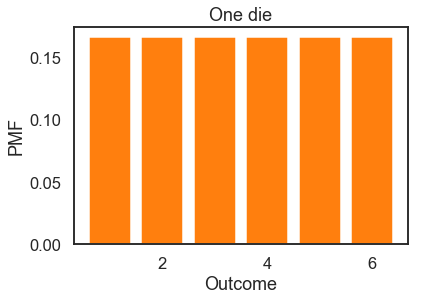

In [11]:
d6.bar()
decorate_dice('One die')

`d6.add_dist(d6)` creates a new `Pmf` that represents the sum of two six-sided dice.

In [12]:
twice = d6.add_dist(d6)
twice

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


**Exercise 1:**  Plot `twice` and compute its mean.

In [13]:
# Solution goes here

**Exercise 2:** Suppose I roll two dice and tell you the result is greater than 3.

Plot the `Pmf` of the remaining possible outcomes and compute its mean.

In [14]:
# Solution goes here

**Bonus exercise:** In Dungeons and Dragons, the amount of damage a [goblin](https://www.dndbeyond.com/monsters/goblin) can withstand is the sum of two six-sided dice.  The amount of damage you inflict with a [short sword](https://www.dndbeyond.com/equipment/shortsword) is determined by rolling one six-sided die.

Suppose you are fighting a goblin and you have already inflicted 3 points of damage.  What is your probability of defeating the goblin with your next successful attack?

Hint: `Pmf` provides comparator functions like `gt_dist` and `le_dist`, which compare two distributions and return a probability.

In [15]:
# Solution goes here

In [16]:
# Solution goes here

### The cookie problem

`Pmf.from_seq` makes a `Pmf` object from a sequence of values.

Here's how we can use it to create a `Pmf` with two equally likely hypotheses.

In [17]:
cookie = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
cookie

,probs
Bowl 1,0.5
Bowl 2,0.5


Now we can update each hypothesis with the likelihood of the data (a vanilla cookie).

In [18]:
cookie['Bowl 1'] *= 0.75
cookie['Bowl 2'] *= 0.5
cookie.normalize()

0.625

And display the posterior probabilities.

In [19]:
cookie

,probs
Bowl 1,0.6
Bowl 2,0.4


**Exercise 3:** Suppose we put the first cookie back, stir, choose again from the same bowl, and get a chocolate cookie.  

What are the posterior probabilities after the second cookie?

Hint: The posterior (after the first cookie) becomes the prior (before the second cookie).

In [20]:
# Solution goes here

**Exercise 4:** Instead of doing two updates, what if we collapse the two pieces of data into one update?

Re-initialize `Pmf` with two equally likely hypotheses and perform one update based on two pieces of data, a vanilla cookie and a chocolate cookie.

The result should be the same regardless of how many updates you do (or the order of updates).

In [21]:
# Solution goes here